In [5]:
!wget O /content/Vision.zip "https://www.dropbox.com/s/mamwc19rgy8wiv5/Vision.zip?dl=1"

--2023-03-28 12:01:42--  http://o/
Resolving o (o)... failed: Name or service not known.
wget: unable to resolve host address ‘o’
/content/Vision.zip: Scheme missing.
--2023-03-28 12:01:42--  https://www.dropbox.com/s/mamwc19rgy8wiv5/Vision.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/mamwc19rgy8wiv5/Vision.zip [following]
--2023-03-28 12:01:42--  https://www.dropbox.com/s/dl/mamwc19rgy8wiv5/Vision.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0bd1069217566c77b6f1de76b9.dl.dropboxusercontent.com/cd/0/get/B5FK-E5ISElNnVneqD1IVwWi0_l8Te1k6HdfEWbNLgvLddHTWD8xfbEz3kpNfict0hJZUKuzNnh7oBlSsckjfcp-7HjKKBZG_X4Gvewv4YIi4WEgpIbS_9S_IcoEE8FIHF0FeR9BGouFHAd92ThMdHzuRf0yKbHwBJ6as4PrBmIwJ3VrmfgLyINXNfyXI5K9344/file?dl=1# [foll

In [ ]:
!unzip /content/Vision.zip -d /content/

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
ROOT = os.getcwd()
dataset_dir = os.path.join(ROOT, 'Vision')
scenario_dir = os.path.join(dataset_dir, 'Scenario6')
development_dir = os.path.join(scenario_dir, 'development_dataset')
challenge_dir = os.path.join(scenario_dir, 'challenge_dataset')

In [9]:
!pip install seedir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seedir as sd
sd.seedir(dataset_dir, itemlimit=10)

In [13]:
import torch

In [14]:
from torchvision import models

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 학습 환경 설정
model = models.resnet50(pretrained=True).to(device) # true 옵션으로 사전 학습된 모델을 로드

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [15]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
# torchvision 관련 라이브러리 import

from torchvision import utils
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [17]:
os.listdir(development_dir)

['scenario6_dev_test.csv',
 'scenario6_dev_train.csv',
 'unit1',
 'scenario6_dev_val.csv']

# 학습용 이미지 로딩

In [18]:
df = pd.read_csv(development_dir + "/scenario6_dev_train.csv")
df

,index,unit1_rgb_1,unit1_pwr_1,beam_index_1
0,1,./unit1/camera_data/image1339_20_22_37.jpg,./unit1/mmWave_data/mmWave_power_256.txt,59
1,2,./unit1/camera_data/image2863_20_25_52.jpg,./unit1/mmWave_data/mmWave_power_556.txt,35
2,3,./unit1/camera_data/image3434_20_27_04.jpg,./unit1/mmWave_data/mmWave_power_715.txt,54
3,4,./unit1/camera_data/image1448_20_22_51.jpg,./unit1/mmWave_data/mmWave_power_365.txt,7
4,5,./unit1/camera_data/image2832_20_25_48.jpg,./unit1/mmWave_data/mmWave_power_526.txt,55
...,...,...,...,...
648,649,./unit1/camera_data/image678_20_21_13.jpg,./unit1/mmWave_data/mmWave_power_63.txt,50
649,650,./unit1/camera_data/image2851_20_25_50.jpg,./unit1/mmWave_data/mmWave_power_544.txt,42
650,651,./unit1/camera_data/image1755_20_23_30.jpg,./unit1/mmWave_data/mmWave_power_389.txt,23
651,652,./unit1/camera_data/image2904_20_25_57.jpg,./unit1/mmWave_data/mmWave_power_597.txt,14


In [19]:
selected_samples = [5,10,20]

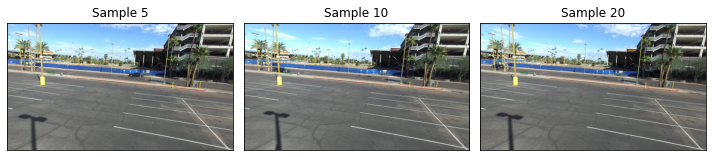

In [20]:
# load the image data
img_rel_paths = df["unit1_rgb_1"].values
fig, axs = plt.subplots(figsize=(10,4), ncols=len(selected_samples), tight_layout = True)
for i, sample_idx in enumerate(selected_samples):
  img_abs_path = os.path.join(development_dir, img_rel_paths[sample_idx])
  img = plt.imread(img_abs_path)
  axs[i].imshow(img)
  axs[i].set_title(f"Sample {sample_idx}")
  axs[i].get_yaxis().set_visible(False)
  axs[i].get_xaxis().set_visible(False)


In [21]:
development_dir

'/content/Vision/Scenario6/development_dataset'

In [22]:
development_dir+ "/unit1/camera_data/unit1/camera_data/"

'/content/Vision/Scenario6/development_dataset/unit1/camera_data/unit1/camera_data/'

In [23]:
path2data = development_dir+ "/unit1/camera_data/"
# get a list of images
filenames = os.listdir(path2data)

In [24]:
filenames

['image772_20_21_25.jpg',
 'image3376_20_26_57.jpg',
 'image728_20_21_19.jpg',
 'image3396_20_26_59.jpg',
 'image4653_20_29_40.jpg',
 'image1776_20_23_33.jpg',
 'image4656_20_29_40.jpg',
 'image3743_20_27_44.jpg',
 'image2091_20_24_13.jpg',
 'image3765_20_27_47.jpg',
 'image2474_20_25_02.jpg',
 'image1769_20_23_32.jpg',
 'image4185_20_28_40.jpg',
 'image2870_20_25_52.jpg',
 'image1449_20_22_51.jpg',
 'image4649_20_29_39.jpg',
 'image1442_20_22_50.jpg',
 'image273_20_20_22.jpg',
 'image2473_20_25_02.jpg',
 'image2925_20_25_59.jpg',
 'image669_20_21_12.jpg',
 'image4938_20_30_16.jpg',
 'image4195_20_28_41.jpg',
 'image294_20_20_24.jpg',
 'image4191_20_28_41.jpg',
 'image2832_20_25_48.jpg',
 'image3358_20_26_54.jpg',
 'image3760_20_27_46.jpg',
 'image3748_20_27_45.jpg',
 'image1438_20_22_50.jpg',
 'image1762_20_23_31.jpg',
 'image4154_20_28_36.jpg',
 'image4920_20_30_14.jpg',
 'image4203_20_28_42.jpg',
 'image2833_20_25_48.jpg',
 'image3397_20_26_59.jpg',
 'image1399_20_22_45.jpg',
 'imag

In [25]:
[os.path.join(path2data, f) for f in filenames]


['/content/Vision/Scenario6/development_dataset/unit1/camera_data/image772_20_21_25.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image3376_20_26_57.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image728_20_21_19.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image3396_20_26_59.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image4653_20_29_40.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image1776_20_23_33.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image4656_20_29_40.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image3743_20_27_44.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image2091_20_24_13.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image3765_20_27_47.jpg',
 '/content/Vision/Scenario6/development_dataset/unit1/camera_data/image2474_20_25_02.jpg',
 

In [26]:
path2data

'/content/Vision/Scenario6/development_dataset/unit1/camera_data/'

In [27]:
df

,index,unit1_rgb_1,unit1_pwr_1,beam_index_1
0,1,./unit1/camera_data/image1339_20_22_37.jpg,./unit1/mmWave_data/mmWave_power_256.txt,59
1,2,./unit1/camera_data/image2863_20_25_52.jpg,./unit1/mmWave_data/mmWave_power_556.txt,35
2,3,./unit1/camera_data/image3434_20_27_04.jpg,./unit1/mmWave_data/mmWave_power_715.txt,54
3,4,./unit1/camera_data/image1448_20_22_51.jpg,./unit1/mmWave_data/mmWave_power_365.txt,7
4,5,./unit1/camera_data/image2832_20_25_48.jpg,./unit1/mmWave_data/mmWave_power_526.txt,55
...,...,...,...,...
648,649,./unit1/camera_data/image678_20_21_13.jpg,./unit1/mmWave_data/mmWave_power_63.txt,50
649,650,./unit1/camera_data/image2851_20_25_50.jpg,./unit1/mmWave_data/mmWave_power_544.txt,42
650,651,./unit1/camera_data/image1755_20_23_30.jpg,./unit1/mmWave_data/mmWave_power_389.txt,23
651,652,./unit1/camera_data/image2904_20_25_57.jpg,./unit1/mmWave_data/mmWave_power_597.txt,14


In [28]:
from torch.utils.data import Dataset
from PIL import Image

class DeepSenseDataset(Dataset):
  def __init__(self, data_dir, transform, data_type = 'train'):
    # path to images
    # path2data = data_dir + "/unit1/camera_data/"
    # get a list of images
    # filenames = os.listdir(path2data)
    # get the full path to images
    # self.full_filenames = [os.path.join(path2data, f) for f in filenames]

    # label
    if data_type == 'train':
      labels_df = pd.read_csv(development_dir + "/scenario6_dev_train.csv")
      labels_df['unit1_rgb_1'].values
      self.full_filenames = [os.path.join(data_dir, f) for f in labels_df['unit1_rgb_1'].values]

      self.labels = [ beam_index for beam_index in labels_df['beam_index_1'].values]

      self.transform = transform
      
    elif data_type == 'validation':
      labels_df = pd.read_csv(development_dir + "/scenario6_dev_val.csv")
      labels_df['unit1_rgb_1'].values
      self.full_filenames = [os.path.join(data_dir, f) for f in labels_df['unit1_rgb_1'].values]

      self.labels = [ beam_index for beam_index in labels_df['beam_index_1'].values]

      self.transform = transform     

  def __len__(self):
    return len(self.full_filenames)

  def __getitem__(self,idx):
    image = Image.open(self.full_filenames[idx])
    image = self.transform(image)
    return image, self.labels[idx]

In [80]:
import numpy as np

# 채널 별 mean 계산
def get_mean(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])
  return [meanR, meanG, meanB]

# 채널 별 str 계산
def get_std(dataset):
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])
  return [stdR, stdG, stdB]

In [83]:
import torchvision.transforms as transforms

data_transformer = transforms.Compose([transforms.Resize((224, 224)),
                                       transforms.ToTensor()
                                       ])

In [30]:
development_dir

'/content/Vision/Scenario6/development_dataset'

In [84]:
train_dataset = DeepSenseDataset(development_dir, data_transformer, data_type='train')
valid_dataset = DeepSenseDataset(development_dir, data_transformer, data_type='validation')


In [32]:
len(train_dataset)

653

In [33]:
len(valid_dataset)

98

In [86]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [47]:
train_dataloader

In [48]:
import torch
import torch.nn as nn
from torch import optim

In [49]:
lr = 0.0001
num_epochs = 25
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_function = nn.CrossEntropyLoss().to(device)

In [87]:
params = {
    'num_epochs':num_epochs,
    'optimizer':optimizer,
    'loss_function':loss_function,
    'train_dataloader':train_dataloader,
    'test_dataloader': valid_dataloader,
    'device':device
}

In [51]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Gen RAM Free: 8.6 GB  |     Proc size: 4.1 GB
GPU RAM Free: 172MB | Used: 14929MB | Util  97% | Total     15360MB


In [88]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [89]:
import torch
torch.cuda.empty_cache()

In [90]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 9            |        cudaMalloc retries: 9         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |    3797 MB |   13894 MB |    6155 GB |    6151 GB |\n|       from large pool |    3728 MB |   13825 MB |    6130 GB |    6126 GB |\n|       from small pool |      69 MB |      81 MB |      25 GB |      25 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |    3797 MB |   13894 MB |    6155 GB |    6151 GB |\n|       from large pool |    3728 MB |   13825 MB |

In [91]:
def train(model, params):
    loss_function=params["loss_function"]
    train_dataloader=params["train_dataloader"]
    test_dataloader=params["test_dataloader"]
    device=params["device"]

    for epoch in range(0, num_epochs):
      for i, data in enumerate(train_dataloader, 0):
        # train dataloader 로 불러온 데이터에서 이미지와 라벨을 분리
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 이전 batch에서 계산된 가중치를 초기화
        optimizer.zero_grad() 

        # forward + back propagation 연산
        outputs = model(inputs)
        train_loss = loss_function(outputs, labels)
        train_loss.backward()
        optimizer.step()

      # test accuracy 계산
      total = 0
      correct = 0
      accuracy = []
      for i, data in enumerate(test_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 결과값 연산
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_loss = loss_function(outputs, labels).item()
        accuracy.append(100 * correct/total)

      # 학습 결과 출력
      print('Epoch: %d/%d, Train loss: %.6f, Test loss: %.6f, Accuracy: %.2f' %(epoch+1, num_epochs, train_loss.item(), test_loss, 100*correct/total))

In [92]:
train(model, params)

Epoch: 1/25, Train loss: 1.334671, Test loss: 1.236395, Accuracy: 33.67
Epoch: 2/25, Train loss: 0.857457, Test loss: 1.380311, Accuracy: 33.67
Epoch: 3/25, Train loss: 0.712728, Test loss: 1.226935, Accuracy: 37.76
Epoch: 4/25, Train loss: 0.549626, Test loss: 1.261386, Accuracy: 41.84
Epoch: 5/25, Train loss: 0.500622, Test loss: 1.584945, Accuracy: 38.78
Epoch: 6/25, Train loss: 0.316088, Test loss: 1.435334, Accuracy: 40.82
Epoch: 7/25, Train loss: 0.256891, Test loss: 1.828272, Accuracy: 43.88
Epoch: 8/25, Train loss: 0.167867, Test loss: 1.641059, Accuracy: 39.80
Epoch: 9/25, Train loss: 0.362370, Test loss: 1.698961, Accuracy: 41.84
Epoch: 10/25, Train loss: 0.208847, Test loss: 1.908409, Accuracy: 39.80
Epoch: 11/25, Train loss: 0.142079, Test loss: 2.354162, Accuracy: 39.80
Epoch: 12/25, Train loss: 0.164596, Test loss: 1.555172, Accuracy: 43.88
Epoch: 13/25, Train loss: 0.065133, Test loss: 2.163629, Accuracy: 36.73
Epoch: 14/25, Train loss: 0.047382, Test loss: 2.064619, Acc